In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy.sparse as sps


# Input data files are available in the read-only "./input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os


In [2]:
RM_train=pd.read_csv('./input/data_train.csv')
R_test=pd.read_csv('./input/data_target_users_test.csv')
URM=pd.read_csv('./input/data_train.csv')
URM_tuples = [tuple(x) for x in URM.to_numpy()]

userList, itemList, ratingList = zip(*URM_tuples)

userList = list(userList)
userList=np.array(userList,dtype=np.int64)
itemList = list(itemList)
itemList=np.array(itemList,dtype=np.int64)

ratingList = list(ratingList)                        #not needed
ratingList=np.array(ratingList,dtype=np.int64)       #not needed

URM_all = sps.coo_matrix((ratingList, (userList, itemList)))
URM_all = URM_all.tocsr()

In [3]:
userList_unique = list(set(userList))
itemList_unique = list(set(itemList))

numUsers = len(userList_unique)
numItems = len(itemList_unique)

numberInteractions= len(URM_tuples)
print ("Number of items\t {}, Number of users\t {}".format(numItems, numUsers))
print("Number of Intraction \t {}" .format(numberInteractions))
print ("Max ID items\t {}, Max Id users\t {}\n".format(max(itemList_unique), max(userList_unique)))
print ("Average interactions per user {:.2f}".format(numberInteractions/numUsers))
print ("Average interactions per item {:.2f}\n".format(numberInteractions/numItems))

print ("Sparsity {:.2f} %".format((1-float(numberInteractions)/(numItems*numUsers))*100))

Number of items	 24896, Number of users	 7947
Number of Intraction 	 113268
Max ID items	 25974, Max Id users	 7946

Average interactions per user 14.25
Average interactions per item 4.55

Sparsity 99.94 %


In [4]:
ICM = pd.read_csv('./input/data_ICM_title_abstract.csv')
ICM_tuples = [tuple(x) for x in ICM.to_numpy()]
itemList_icm, featureList_icm, scoreList_icm = zip(*ICM_tuples)

itemList_icm = list(itemList_icm)
itemList_icm = np.array(itemList_icm,dtype=np.int64)

featureList_icm = list(featureList_icm)
featureList_icm = np.array(featureList_icm,dtype=np.int64)

scoreList_icm = list(scoreList_icm)
scoreList_icm = np.array(scoreList_icm,dtype=np.float64)

ICM_all = sps.coo_matrix((scoreList_icm, (itemList_icm, featureList_icm)))

ICM_all

<25975x20000 sparse matrix of type '<class 'numpy.float64'>'
	with 490691 stored elements in COOrdinate format>

In [5]:
from Base.Evaluation.Evaluator import EvaluatorHoldout
from Data_manager.split_functions.split_train_validation_random_holdout import split_train_in_two_percentage_global_sample

URM_train, URM_test = split_train_in_two_percentage_global_sample(URM_all, train_percentage = 0.80)
URM_train, URM_validation = split_train_in_two_percentage_global_sample(URM_train, train_percentage = 0.80)

evaluator_validation = EvaluatorHoldout(URM_validation, cutoff_list=[10])
evaluator_test = EvaluatorHoldout(URM_test, cutoff_list=[10])

In [6]:
from KNN.ItemKNNCBFRecommender import ItemKNNCBFRecommender

x_tick = [10, 50, 100, 200, 500,100]
MAP_per_k = []

for topK in x_tick:
    recommender = ItemKNNCBFRecommender(URM_train, ICM_all)
    recommender.fit(shrink=0.0, topK=topK)
    
    result_dict, _ = evaluator_test.evaluateRecommender(recommender)
    
    MAP_per_k.append(result_dict[10]["MAP"])
    
print(MAP_per_k)

ItemKNNCBFRecommender: URM Detected 233 (2.93 %) cold users.
ItemKNNCBFRecommender: URM Detected 3982 (15.33 %) cold items.
Similarity column 25975 ( 100 % ), 4354.57 column/sec, elapsed time 0.10 min
EvaluatorHoldout: Processed 5628 ( 100.00% ) in 2.82 sec. Users per second: 1996
ItemKNNCBFRecommender: URM Detected 233 (2.93 %) cold users.
ItemKNNCBFRecommender: URM Detected 3982 (15.33 %) cold items.
Similarity column 25975 ( 100 % ), 4280.47 column/sec, elapsed time 0.10 min
EvaluatorHoldout: Processed 5628 ( 100.00% ) in 2.94 sec. Users per second: 1912
ItemKNNCBFRecommender: URM Detected 233 (2.93 %) cold users.
ItemKNNCBFRecommender: URM Detected 3982 (15.33 %) cold items.
Similarity column 25975 ( 100 % ), 4193.46 column/sec, elapsed time 0.10 min
EvaluatorHoldout: Processed 5628 ( 100.00% ) in 3.02 sec. Users per second: 1866
ItemKNNCBFRecommender: URM Detected 233 (2.93 %) cold users.
ItemKNNCBFRecommender: URM Detected 3982 (15.33 %) cold items.
Similarity column 25975 ( 100 

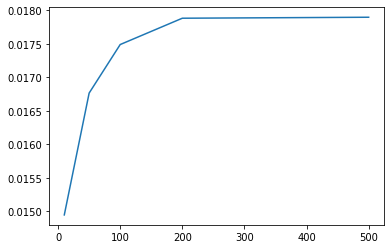

In [7]:
import matplotlib.pyplot as pyplot

pyplot.plot(x_tick, MAP_per_k)
pyplot.show()


In [8]:
x_tick = [5,10,15,20]
MAP_per_shrinkage = []

for shrink in x_tick:
    
    recommender = ItemKNNCBFRecommender(URM_train, ICM_all)
    recommender.fit(shrink=shrink, topK=100)
    
    result_dict, _ = evaluator_test.evaluateRecommender(recommender)
    
    MAP_per_shrinkage.append(result_dict[10]["MAP"])
    
print(MAP_per_shrinkage)

ItemKNNCBFRecommender: URM Detected 233 (2.93 %) cold users.
ItemKNNCBFRecommender: URM Detected 3982 (15.33 %) cold items.
Similarity column 25975 ( 100 % ), 4228.15 column/sec, elapsed time 0.10 min
EvaluatorHoldout: Processed 5628 ( 100.00% ) in 3.68 sec. Users per second: 1531
ItemKNNCBFRecommender: URM Detected 233 (2.93 %) cold users.
ItemKNNCBFRecommender: URM Detected 3982 (15.33 %) cold items.
Similarity column 25975 ( 100 % ), 3750.82 column/sec, elapsed time 0.12 min
EvaluatorHoldout: Processed 5628 ( 100.00% ) in 3.46 sec. Users per second: 1627
ItemKNNCBFRecommender: URM Detected 233 (2.93 %) cold users.
ItemKNNCBFRecommender: URM Detected 3982 (15.33 %) cold items.
Similarity column 25975 ( 100 % ), 3824.00 column/sec, elapsed time 0.11 min
EvaluatorHoldout: Processed 5628 ( 100.00% ) in 2.97 sec. Users per second: 1893
ItemKNNCBFRecommender: URM Detected 233 (2.93 %) cold users.
ItemKNNCBFRecommender: URM Detected 3982 (15.33 %) cold items.
Similarity column 25975 ( 100 

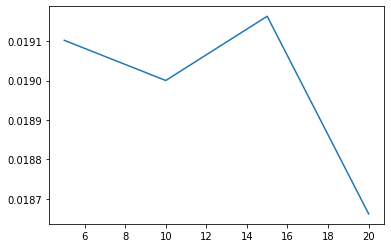

In [9]:
pyplot.plot(x_tick, MAP_per_shrinkage)
pyplot.show()

In [25]:
recommender = ItemKNNCBFRecommender(URM_all, ICM_all)
recommender.fit(shrink=15, topK=200)

ItemKNNCBFRecommender: URM Detected 1079 (4.15 %) cold items.
Similarity column 25975 ( 100 % ), 3524.10 column/sec, elapsed time 0.12 min


In [26]:
userTestList = [x for x in R_test.to_numpy()]
userTestList = zip(*userTestList)
userTestList = [list(a) for a in userTestList][0]

In [27]:
recoms = recommender.recommend(userTestList, cutoff=10)

In [28]:
recomList = []
for i in range(len(recoms)):
    recomList.append(' '.join(str(e) for e in recoms[i]))
# print(recoms)

res = {"user_id": userTestList, "item_list": recomList}
result = pd.DataFrame(res, columns= ['user_id', 'item_list'])

result.to_csv ('outputs/cbfv1.csv', index = False, header=True)

In [29]:
ICM_all = ICM_all.tocsr()
num_tot_items = ICM_all.shape[0]

# let's count how many items have a certain feature
items_per_feature = np.ediff1d(ICM_all.indptr) + 1
print(items_per_feature)

IDF = np.array(np.log(num_tot_items / items_per_feature))

print(ICM_all.shape)
print(IDF.shape)

[18  6 22 ... 26 15 16]
(25975, 20000)
(25975,)


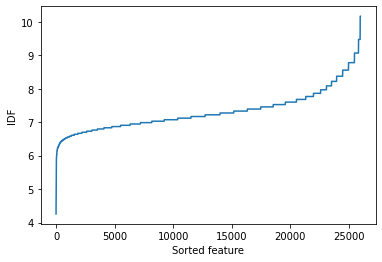

In [30]:
pyplot.plot(np.sort(IDF))
pyplot.ylabel('IDF')
pyplot.xlabel('Sorted feature')
pyplot.show()

In [33]:
sorted_features = np.argsort(-IDF)

highest_ranked_features = sorted_features[:20]

for feature_index in highest_ranked_features:
    print(feature_index)

7153
6181
20612
23790
15981
2328
5550
10424
12247
25504
20299
20724
9629
25180
21183
670
19660
6451
15694
9980


In [34]:
lowest_ranked_features = sorted_features[-20:]

for feature_index in lowest_ranked_features:
    print(feature_index)    

20608
14216
4925
14554
25151
15277
16030
25165
8328
11438
14863
11941
852
25472
7920
17921
4113
20816
10833
21611


In [35]:
from scipy.sparse import diags
diags(IDF)

<25975x25975 sparse matrix of type '<class 'numpy.float64'>'
	with 25975 stored elements (1 diagonals) in DIAgonal format>

In [36]:
ICM_idf = ICM_all.copy()

ICM_idf = diags(IDF)*ICM_idf

In [37]:
recommender_idf = ItemKNNCBFRecommender(URM_train, ICM_idf)
recommender_idf.fit(shrink=15, topK=200)

result_dict, _ = evaluator_test.evaluateRecommender(recommender_idf)
result_dict[10]

ItemKNNCBFRecommender: URM Detected 233 (2.93 %) cold users.
ItemKNNCBFRecommender: URM Detected 3982 (15.33 %) cold items.
Similarity column 25975 ( 100 % ), 4027.16 column/sec, elapsed time 0.11 min
EvaluatorHoldout: Processed 5628 ( 100.00% ) in 3.37 sec. Users per second: 1668


{'ROC_AUC': 0.06778444794169743,
 'PRECISION': 0.014001421464108016,
 'PRECISION_RECALL_MIN_DEN': 0.04563802303674362,
 'RECALL': 0.04390271523681687,
 'MAP': 0.019225104131915714,
 'MRR': 0.04740131541837297,
 'NDCG': 0.031124911846906772,
 'F1': 0.021231658201703967,
 'HIT_RATE': 0.14001421464108033,
 'ARHR': 0.052683789104364734,
 'NOVELTY': 0.004903299915404038,
 'AVERAGE_POPULARITY': 0.016858105784441996,
 'DIVERSITY_MEAN_INTER_LIST': 0.9969641245143952,
 'DIVERSITY_HERFINDAHL': 0.9996786980924396,
 'COVERAGE_ITEM': 0.6065447545717035,
 'COVERAGE_ITEM_CORRECT': 0.027834456207892204,
 'COVERAGE_USER': 0.7081917704794262,
 'COVERAGE_USER_CORRECT': 0.07977853277966528,
 'DIVERSITY_GINI': 0.28827511546933376,
 'SHANNON_ENTROPY': 13.042726914915928}